#Problem Tanımı: Omurga Disk Kayması Tespiti

Omurga disk kayması, omurgadaki disklerin yer değiştirmesi sonucu omurilik veya sinirlere baskı yaparak ağrı ve fonksiyon kaybına yol açan bir durumdur. Günümüzde, manyetik rezonans görüntüleme (MRI) gibi ileri görüntüleme teknikleri kullanılarak disk kayması tespiti yapılmaktadır. Ancak, bu tür görüntülerin incelenmesi oldukça zaman alıcıdır ve hata payı insan faktörüne bağlı olarak değişebilmektedir. Bu projede, MRI görüntüleri üzerinde otomatik segmentasyon teknikleri kullanılarak omurga disk kayması ve hasar tespiti yapmayı hedefliyoruz.

Bu projenin amacı, disk kaymasının hızlı ve doğru bir şekilde tespitini sağlayacak bir otomasyon sistemi geliştirmektir. Bu sistem, omurga bölgesindeki kaymış diskleri segmentasyon yoluyla işaretleyecek ve ardından potansiyel hastalıklı alanları tanımlayacaktır.


.

#Belirtilen dizinlerdeki görüntü ve etiket dosyalarını yükleyerek, her birini görselleştirir. İşlem adımlarını şu şekilde özetleyebiliriz:

1. Görüntü ve Etiket Dosyalarını Yükleme:

2. Label Görüntüsünden Kenarları Bulma:

3. Görselleştirme:

4. Görselleştirme Ayrıntıları:


#Özet:
Kodun genel amacı, belirtilen dizindeki ilk üç görüntü ve etiket dosyasını yükleyip, her birini yan yana görselleştirerek görüntülerin ve etiketlerin nasıl eşleştiğini kontrol etmektir. Bu işlem, etiketlerin doğru şekilde alınıp alınmadığını ve görüntülerle nasıl ilişkilendirildiğini görselleştirmek için faydalıdır.








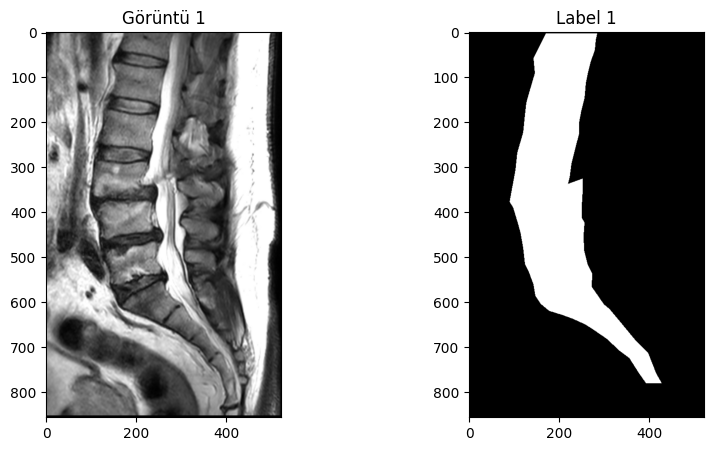

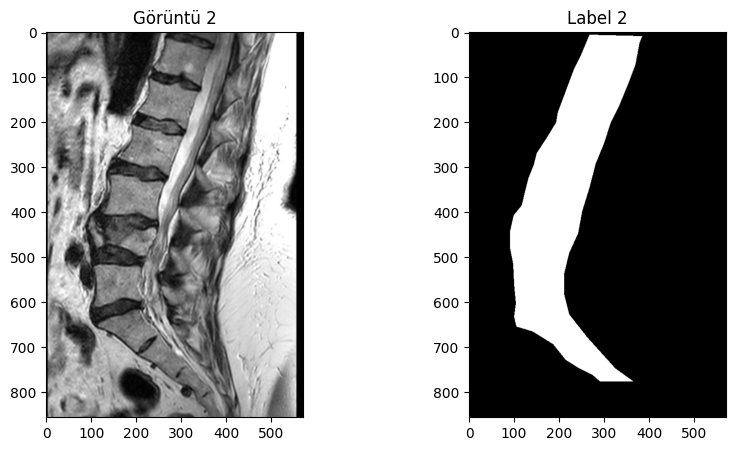

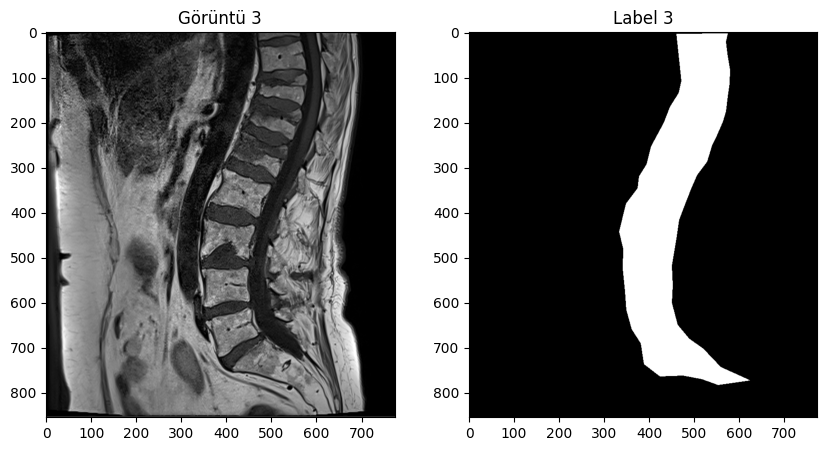

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.measure import label as skimage_label, regionprops
from skimage.morphology import binary_dilation, disk

# Görüntü ve etiket dosyalarının yolu
image_path = '/content/drive/MyDrive/DB2'
label_path = '/content/drive/MyDrive/labels'

# Görüntü ve label yükleme
def load_image_and_label(image_file, label_file):
    image = io.imread(image_file)
    label = io.imread(label_file)
    return image, label

# bwboundary benzeri bir işlem
def get_boundaries(label_image):
    boundaries = []
    labeled = skimage_label(label_image)
    for region in regionprops(labeled):
        coords = region.coords
        boundaries.extend(coords)
    return np.array(boundaries)

# İlk 3 görsel ve etiket dosyasını yükleme
for i in range(1, 4):  # 1'den 3'e kadar olan görseller
    image_file = f"{image_path}/img ({i}).png"
    label_file = f"{label_path}/labels ({i}).png"

    image, label = load_image_and_label(image_file, label_file)

    # Görüntü ve etiket görselleştirme
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Görüntü {i}")
    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap='gray')
    plt.title(f"Label {i}")
    plt.show()


#Etiket görüntüsündeki kenar noktalarını tespit etmek ve bu kenarları orijinal etiket görüntüsü üzerinde görselleştirmek için kullanılır. İşlem adımlarını şu şekilde özetleyebiliriz:

#1. Kenarları Bulmak için find_contours Fonksiyonu:

get_boundaries_from_label fonksiyonu, verilen etiket görüntüsündeki kenar noktalarını bulur.

#2. Kenar Noktalarını Çıkarmak:
find_contours fonksiyonu, kenarları bir koordinat listesi (y, x) olarak döndürür.

#3. Kenarları Görselleştirmek:
Kenar noktalarını işaretlemek amacıyla, etiketli görüntü üzerinde bu noktalar kırmızı renkle gösterilir.

#Özet:
Etiket görüntüsündeki kenarları bulmak için find_contours() fonksiyonunu kullanarak etiketli bölgenin sınırlarını tespit eder ve bu kenar noktalarını kırmızı noktalarla etiket görüntüsü üzerinde görselleştirir. Bu işlem, kenarların belirginleşmesini sağlar ve etiketlerin doğru yerleştirilip yerleştirilmediğini kontrol etmeyi kolaylaştırır.

In [17]:
from skimage.measure import find_contours

def get_boundaries_from_label(label_image):
    """
    Label görüntüsünden kenarları elde et.
    :param label_image: Etiket görüntüsü (binary veya integer mask)
    :return: Kenar noktalarının koordinatları
    """
    # Binary hale getir (etiketli alanları 1 yap)
    binary_label = label_image > 0

    # Kenarları bul
    boundaries = find_contours(binary_label, level=0.5)

    # Kenar noktalarını kaydet
    edge_points = []
    for boundary in boundaries:
        for y, x in boundary:
            edge_points.append((y, x))  # Y ve X koordinatları

    return np.array(edge_points)

# Kenar noktalarını çıkar
edge_points = get_boundaries_from_label(label)



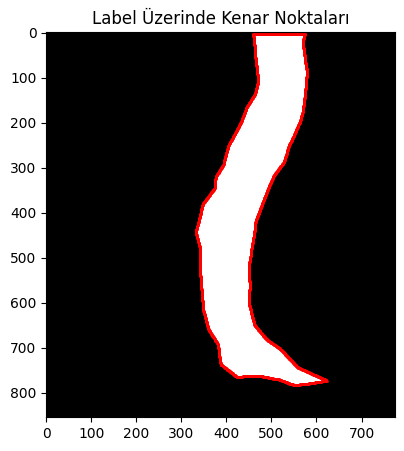

In [18]:
# Kenar noktalarını görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(label, cmap='gray')
plt.scatter(edge_points[:, 1], edge_points[:, 0], c='red', s=1)  # Kenar noktalarını işaretle
plt.title("Label Üzerinde Kenar Noktaları")
plt.show()


 #Kenar noktalarından çizgiler çıkartmak ve bu çizgileri görselleştirmek için kullanılır. İşlem adımlarını şu şekilde özetleyebiliriz:

 #1. extract_lines Fonksiyonu:
Amacı: Kenar noktalarından belirli bir uzunlukta çizgiler çıkarmak ve bu çizgileri bir matris şeklinde kaydetmek.

#2. Çizgilerin Çıkarılması:
get_boundaries_from_label(label) fonksiyonu ile etiketli görüntüden kenar noktaları çıkarılır.

#3. Çizgilerin Görselleştirilmesi:
lines_matrix matrisinde bulunan çizgilerden ilk çizgi (lines_matrix[0]) bir örnek olarak seçilir.

#4. Matris Boyutu ve Çizgi Örneği:
Çizgi matrisinin boyutu yazdırılır (lines_matrix.shape).
Birinci çizgi (lines_matrix[0]), örnek olarak seçilir ve görselleştirilir.

#Özet:
Kod, etiketli görüntüdeki kenar noktalarından çizgiler çıkarır. Her bir çizgi, kenar noktasından belirli yönlerdeki piksel değerlerini toplar. Çizgiler, belirtilen uzunlukta ve yönlerde çıkarılır. Sonrasında çıkarılan çizgiler görselleştirilir, böylece kenar noktalarından elde edilen desenler incelenebilir.

Çizgi Matrisinin Boyutu: (18860, 5)
Örnek Çizgi: [0.72941176 0.68627451 0.60392157 0.52941176 0.4627451 ]


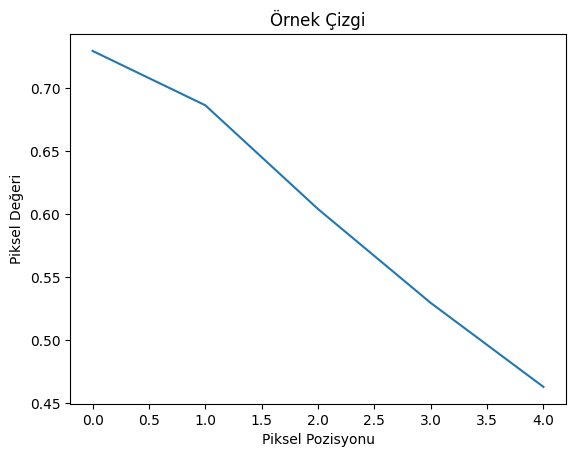

In [25]:
def extract_lines(boundaries, image, line_length):
    """
    Kenar noktalarından çizgiler çıkar ve kodlar.
    :param boundaries: Kenar noktalarının koordinatları
    :param image: Gri seviyeli giriş görüntüsü
    :param line_length: Çizgi uzunluğu (X)
    :return: Çizgilerin bulunduğu matris M
    """
    rows, cols = image.shape
    lines = []

    for y, x in boundaries:
        # Yönler: Yukarı, Aşağı, Sağ, Sol, Çapraz
        directions = [
            (0, 1),  # Sağ
            (1, 0),  # Aşağı
            (0, -1),  # Sol
            (-1, 0),  # Yukarı
            (1, 1),  # Çapraz sağ aşağı
            (1, -1),  # Çapraz sol aşağı
            (-1, 1),  # Çapraz sağ yukarı
            (-1, -1)  # Çapraz sol yukarı
        ]

        for dy, dx in directions:
            line = []
            for i in range(line_length):
                new_y, new_x = int(y + i * dy), int(x + i * dx)  # tamsayıya dönüştürme
                if 0 <= new_y < rows and 0 <= new_x < cols:
                    line.append(image[new_y, new_x])
                else:
                    break  # Çizgi görüntü dışına çıkarsa sonlandır
            if len(line) == line_length:
                lines.append(line)

    return np.array(lines)

# Kenar noktalarını çıkar
edge_points = get_boundaries_from_label(label)

# Çizgi uzunluğu (X)
line_length = 5  # Örnek uzunluk, ihtiyaca göre değiştirilebilir

# Çizgileri çıkar ve kodla
lines_matrix = extract_lines(edge_points, image, line_length)

# Matrisin boyutunu ve örnek bir çizgiyi yazdır
print(f"Çizgi Matrisinin Boyutu: {lines_matrix.shape}")
print(f"Örnek Çizgi: {lines_matrix[0]}")

# Çizgileri görselleştirme (örnek çizgi)
plt.plot(lines_matrix[0])
plt.title("Örnek Çizgi")
plt.xlabel("Piksel Pozisyonu")
plt.ylabel("Piksel Değeri")
plt.show()


 #Etiketli bir görüntüdeki kenar noktalarından çizgiler çıkararak, her açı için ortalama piksel değerlerini hesaplamak amacıyla kullanılır. İşlemi adım adım açıklayalım:
 .

 #1. calculate_average_vectors Fonksiyonu:
Amacı: Kenar noktalarından, belirtilen açıları kullanarak çizgiler çıkarır ve her açı için ortalama piksel değerlerini hesaplar.

#2. Açıların Belirlenmesi:
Açıları np.arange(0, 360, 10) ile oluşturulur. Bu, 0°'dan 350°'ye kadar 10° aralıklarla 36 farklı açı oluşturur.

#3. Ortalama Vektörlerin Hesaplanması:
calculate_average_vectors fonksiyonu, her açı için çizgiler çıkarır ve her çizgi için ortalama piksel değerlerini hesaplar.
Bu işlem sonucunda, her açı için bir ortalama piksel değeri elde edilir ve bu değerler bir dizi (average_vectors) olarak saklanır.

#4. Sonuçların Görselleştirilmesi:
average_vectors dizisi, her açı için hesaplanan ortalama piksel değerlerini içerir.

#Özet:
Etiketli bir görüntüdeki kenarları analiz ederek, her açı için belirli uzunlukta çizgiler çıkartır ve bu çizgilerdeki ortalama piksel değerlerini hesaplar. Bu hesaplamalar, görüntüdeki yapıyı ve kenarları belirli açılarda daha iyi anlamaya yardımcı olabilir. Çıkarılan ortalama piksel değerleri, görselleştirilerek hangi açılarda daha fazla kontrast veya kenar bulunduğu görsel olarak gösterilir.

Ortalama Vektör (18 yön): [0.56664135 0.57105585 0.57286588 0.57584046 0.57869254 0.58525843
 0.58910062 0.59270631 0.59504749 0.59732824 0.59623948 0.59389797
 0.59258969 0.590616   0.58447216 0.5832609  0.58197385 0.57971009
 0.57538575 0.57644021 0.57501172 0.57227168 0.57146679 0.5853357
 0.58532815 0.58476887 0.58360218 0.58043094 0.57947844 0.57697825
 0.5761688  0.57526274 0.56236143 0.5634796  0.56633233 0.56719537]


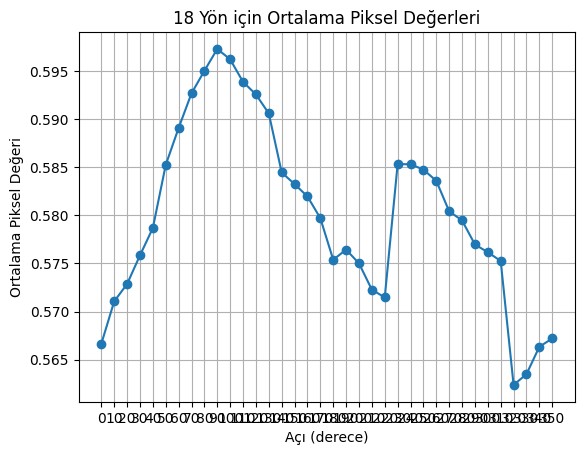

In [27]:
import math

def calculate_average_vectors(boundaries, image, line_length, angles):
    """
    Kenar noktalarından çizgiler çıkar ve her açı için ortalama bir vektör oluştur.
    :param boundaries: Kenar noktalarının koordinatları
    :param image: Gri seviyeli giriş görüntüsü
    :param line_length: Çizgi uzunluğu (X)
    :param angles: Açılar (derece cinsinden)
    :return: 18 elemanlı ortalama vektör
    """
    rows, cols = image.shape
    average_vectors = []

    for angle in angles:
        # Açıdan yön türet (sin ve cos ile)
        dx = math.cos(math.radians(angle))
        dy = math.sin(math.radians(angle))
        lines = []

        for y, x in boundaries:
            line = []
            for i in range(line_length):
                # Açıya göre yeni noktaları hesapla
                new_y = int(round(y + i * dy))
                new_x = int(round(x + i * dx))
                if 0 <= new_y < rows and 0 <= new_x < cols:
                    line.append(image[new_y, new_x])
                else:
                    break
            if len(line) == line_length:
                lines.append(line)

        # Çizgilerden ortalama hesapla
        if len(lines) > 0:
            average_vectors.append(np.mean(lines))
        else:
            average_vectors.append(0)  # Eğer hiç çizgi yoksa 0 koy

    return np.array(average_vectors)

# Kenar noktalarını çıkar
boundaries = get_boundaries_from_label(label)

# Açıları oluştur
angles = np.arange(0, 360, 10)  # 0'dan 360 dereceye kadar, 10 derece aralıklarla

# Ortalama vektörleri hesapla
average_vectors = calculate_average_vectors(boundaries, image, line_length=5, angles=angles)

# Sonucu yazdır
print(f"Ortalama Vektör (18 yön): {average_vectors}")

# Görselleştirme
plt.plot(angles, average_vectors, marker='o')
plt.title("18 Yön için Ortalama Piksel Değerleri")
plt.xlabel("Açı (derece)")
plt.ylabel("Ortalama Piksel Değeri")
plt.xticks(angles)
plt.grid()
plt.show()



#Etiketli bir görüntüdeki kenar noktalarından, belirli bir boyutta ("patch" adı verilen küçük kare bölgeler) yamalar çıkararak, her yamanın ortalama piksel değerini hesaplar ve bu değerlerin dağılımını görselleştirir. Adım adım açıklayalım:


#1. extract_patches Fonksiyonu:
Amacı: Kenar noktalarından belirli bir boyutta (m x m) kareler ("patch") çıkarır ve her bir yamadaki piksel değerlerinin ortalamasını hesaplar.

#2. Yama Boyutunun Belirlenmesi:
patch_size = 5 olarak belirlenmiştir. Bu durumda çıkarılacak yamalar 5x5 boyutunda olacaktır.
half_size = patch_size // 2 hesaplanarak, yamaların kenar noktalarından simetrik olarak bir yarıçap ile genişlemesi sağlanır.

#3. Yama Özelliklerinin Çıkarılması:
Kenar noktalarından her birinin etrafındaki 5x5 boyutunda bir yama çıkarılır.
Her yamadaki piksel değerlerinin ortalaması hesaplanır ve bu ortalama, patch_features listesine eklenir.

#4. Sonuçların Görselleştirilmesi:
Kod, çıkarılan yamaların ortalama piksel değerlerini plt.hist fonksiyonu ile bir histogramda gösterir. Histogramda, yamaların ortalama değerlerinin dağılımı görselleştirilir.
Yama ortalamaları yatay eksende, yama sayıları ise dikey eksende gösterilir.

#Özet:
Bu kod, kenar noktalarından belirli boyutlarda yamalar çıkarır ve her bir yamadaki piksellerin ortalama değerini hesaplar. Bu ortalama değerler, görüntüdeki kenar özelliklerini anlamak için kullanılabilir. Ayrıca, çıkartılan bu ortalama değerlerin histogramını çizerek, piksel değerlerinin nasıl dağıldığını görselleştirir.

Toplam Yamalar: 2401
Örnek Patch Özelliği (Ortalama): [0.70462745 0.72831373 0.72235294 0.6934902  0.63890196]


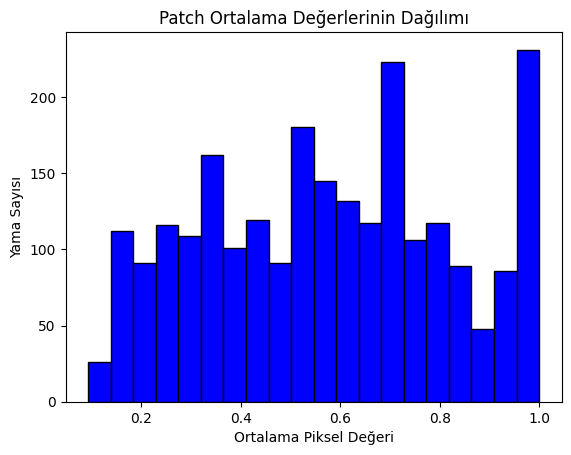

In [29]:
def extract_patches(boundaries, image, patch_size):
    """
    Kenar noktalarından mxm boyutlu yamalar çıkar ve özellikleri kodlar.
    :param boundaries: Kenar noktalarının koordinatları
    :param image: Gri seviyeli giriş görüntüsü
    :param patch_size: Patch boyutu (m x m)
    :return: Yamaların ortalamalarını içeren bir liste
    """
    rows, cols = image.shape
    half_size = patch_size // 2  # Yamanın yarıçapı
    patches = []

    for y, x in boundaries:
        # Yama sınırlarını hesapla
        y_min = int(max(y - half_size, 0))
        y_max = int(min(y + half_size + 1, rows))
        x_min = int(max(x - half_size, 0))
        x_max = int(min(x + half_size + 1, cols))

        # Yama çıkar
        patch = image[y_min:y_max, x_min:x_max]

        # Eğer yama boyutu tam olarak mxm değilse, atla (kenarlarda olabilir)
        if patch.shape == (patch_size, patch_size):
            # Yama için özellik çıkar (örneğin ortalama)
            patches.append(np.mean(patch))

    return np.array(patches)

# Patch boyutu (m x m)
patch_size = 5  # Örneğin: 5x5

# Yamaları çıkar ve kodla
patch_features = extract_patches(boundaries, image, patch_size)

# Sonucu yazdır
print(f"Toplam Yamalar: {len(patch_features)}")
print(f"Örnek Patch Özelliği (Ortalama): {patch_features[:5]}")

# Yamaların histogramını görselleştir
plt.hist(patch_features, bins=20, color='blue', edgecolor='black')
plt.title("Patch Ortalama Değerlerinin Dağılımı")
plt.xlabel("Ortalama Piksel Değeri")
plt.ylabel("Yama Sayısı")
plt.show()


#Görüntüdeki kenarları dairesel bir yapısal elementle genişletir ve genişletilen bölgedeki piksel özelliklerini (örneğin ortalama piksel değeri) hesaplar. Adım adım açıklayalım:

#1. dilate_and_code Fonksiyonu:
Amacı: Kenar noktalarını dairesel bir yapısal element kullanarak genişletir ve genişletilen bölgedeki piksellerin ortalama değerini hesaplar.

#2. Genişletme ve Kodlama İşlemi:
struct_element_radius = 5 olarak belirtilmiştir, yani yapısal elementin yarıçapı 5 piksel olarak ayarlanır.
dilate_and_code(boundaries, image, struct_element_radius) fonksiyonu çağrılarak, kenarlar genişletilir ve genişletilen bölgedeki piksellerin ortalaması hesaplanır.

#3. Sonuçların Görselleştirilmesi:
Kod, orijinal görüntüyü ve genişletilmiş kenarları yan yana göstermek için iki alt grafiği (subplot) oluşturur:
İlk grafik, orijinal görüntüyü (gri tonlamada) gösterir.
İkinci grafik, genişletilmiş kenarları gösterir.

#Özet:
Görüntüdeki kenarları genişletmek için dairesel bir yapı kullanır. Genişletilen bölgeyi elde ettikten sonra, bu bölgedeki piksellerin ortalama değerini hesaplar. Sonuçları hem sayısal olarak yazdırır hem de orijinal görüntü ile genişletilmiş kenarları görselleştirir.



Genişletilmiş Bölgenin Ortalama Piksel Değeri: 0.5705211333919085


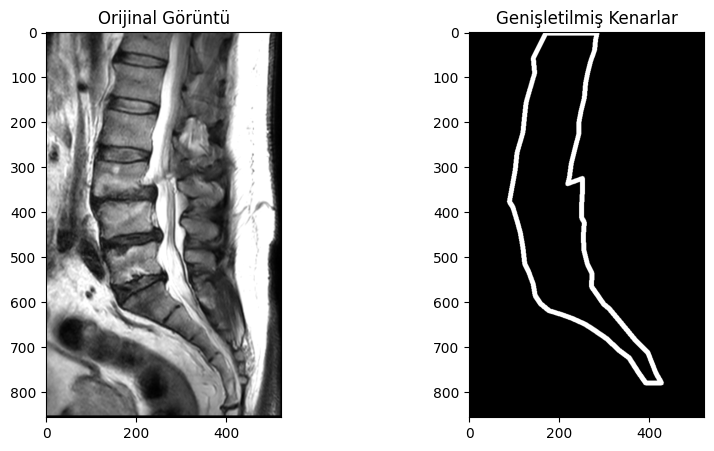

In [31]:
from skimage.morphology import disk, dilation
import numpy as np
import matplotlib.pyplot as plt

def dilate_and_code(boundaries, image, struct_element_radius):
    """
    Kenarları dairesel bir yapısal elementle genişlet ve genişletilen bölgeyi kodla.
    :param boundaries: Kenar noktalarının koordinatları
    :param image: Gri seviyeli giriş görüntüsü
    :param struct_element_radius: Yapısal elementin yarıçapı
    :return: Genişletilmiş bölgenin piksel özellikleri
    """
    rows, cols = image.shape

    # Boş bir maske oluştur
    edge_mask = np.zeros_like(image, dtype=bool)

    # Kenar noktalarını maskeye işaretle (y ve x'leri int olarak dönüştür)
    for y, x in boundaries:
        edge_mask[int(y), int(x)] = True  # Y ve X'i int() ile tam sayıya dönüştür

    # Yapısal element oluştur (disk)
    struct_element = disk(struct_element_radius)

    # Kenar maskesini genişlet
    dilated_edges = dilation(edge_mask, struct_element)

    # Genişletilmiş bölgeye karşılık gelen piksel değerlerini al
    dilated_region_pixels = image[dilated_edges]

    # Piksel değerlerinin ortalamasını hesapla
    region_mean = np.mean(dilated_region_pixels)

    return dilated_edges, region_mean

# Yapısal elementin çapı (örnek olarak 5 piksel)
struct_element_radius = 5

# Genişletme ve kodlama işlemi
dilated_edges, region_mean = dilate_and_code(boundaries, image, struct_element_radius)

# Sonuçları yazdır
print(f"Genişletilmiş Bölgenin Ortalama Piksel Değeri: {region_mean}")

# Genişletilmiş bölgeyi görselleştir
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Görüntü")
plt.subplot(1, 2, 2)
plt.imshow(dilated_edges, cmap='gray')
plt.title("Genişletilmiş Kenarlar")
plt.show()


#Test görüntüsünde kenarları tespit etmek, modelle eşleşen kenarları bulmak ve sonuç olarak segmentasyon yapmak için kullanılan bir işleme sürecini gerçekleştirir. Adım adım açıklayalım:

#1. test_segmentation Fonksiyonu:
Amacı: Test görüntüsünde kenarları tespit etmek, modelle eşleşen kenarları belirlemek ve segmentasyon yapmak.

#2. Test Görüntüsü Yükleme:
test_image_path yolunda belirtilen test görüntüsü yüklenir.
Eğer görüntü 4 kanaldan (RGBA) oluşuyorsa, alfa kanalı atılır ve sadece RGB kanalları kullanılır.
Görüntü, color.rgb2gray() fonksiyonu ile gri tonlamaya dönüştürülür.

#3. Modelleme Ortalama Değeri ve Eşik Değeri:
model_mean, önceki aşamalarda hesaplanan modelin ortalama piksel değeriyle eşleştirilir.
threshold, eşleşme için kullanılan tolerans değeridir (15 olarak belirlenmiş).

#4. Segmentasyon İşlemi:
test_segmentation() fonksiyonu, test görüntüsü üzerinde kenar tespiti yapar, modelle eşleşen kenarları bulur ve segmentasyon gerçekleştirir.
#5. Sonuçların Görselleştirilmesi:
Kenarlıklar (Canny): İlk olarak, Canny kenar tespiti sonucu görselleştirilir.
Modelle Eşleşen Kenarlar: Modelle eşleşen kenarlar (yani, ortalama değerle belirli bir farkın altında kalanlar) görselleştirilir.

#Özet:
Bir test görüntüsündeki kenarları tespit etmek için Canny veya Sobel kenar algılama yöntemlerinden birini kullanır. Sonra, modelin ortalama değerine dayalı olarak eşleşen kenarları belirler ve bu eşleşen kenarları segmentasyonla temizler. Sonuç olarak, orijinal kenarlar, modelle eşleşen kenarlar ve segmentasyon sonucu görselleştirilir.








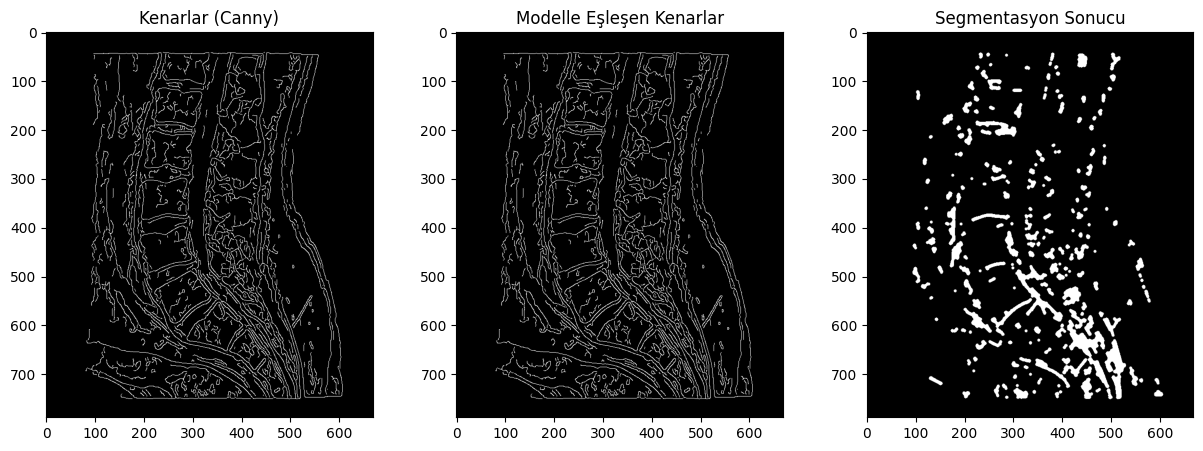

In [34]:
from skimage.feature import canny
from skimage.filters import sobel
from skimage.morphology import binary_closing, binary_opening, disk
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt

def test_segmentation(test_image, model_mean, threshold, method='canny'):
    """
    Test görüntüsünün kenarlarını çıkar, model kodlamasıyla eşleştir ve segmentasyon yap.
    :param test_image: Test görüntüsü (gri seviyeli)
    :param model_mean: Modelleme aşamasında hesaplanan ortalama değer
    :param threshold: Benzerlik için eşik değeri
    :param method: Kenar tespiti yöntemi ('canny' veya 'sobel')
    :return: Segmentasyon sonucu
    """
    # Kenarları çıkar (Canny veya Sobel ile)
    if method == 'canny':
        edges = canny(test_image, sigma=1)
    elif method == 'sobel':
        edges = sobel(test_image) > 0.1
    else:
        raise ValueError("Yalnızca 'canny' veya 'sobel' yöntemleri desteklenir.")

    # Kenar noktalarının piksel değerlerini alın
    edge_pixels = test_image[edges]

    # Modelle eşleşen noktaları tut
    match_mask = np.abs(edge_pixels - model_mean) <= threshold
    matched_edges = np.zeros_like(edges)
    matched_edges[edges] = match_mask

    # Segmentasyon için morfolojik operasyonlar (binary closing ve opening)
    segmented = binary_closing(matched_edges, disk(3))
    segmented = binary_opening(segmented, disk(3))

    return segmented, edges, matched_edges

# Test görüntüsünü yükleyin (dosya yolu güncellendi)
test_image_path ='/content/drive/MyDrive/DB2/img (5).png'
test_image = io.imread(test_image_path)

# Eğer görüntü 4 kanal içeriyorsa, alfa kanalını atın ve sadece RGB kullanın
if test_image.shape[2] == 4:
    test_image = test_image[:, :, :3]

# Test görüntüsü gri seviyeye dönüştürülmüş mü kontrol edin
test_image = color.rgb2gray(test_image)

# Modelleme sırasında hesaplanan ortalama değer
model_mean = region_mean  # Önceki aşamada hesaplanan ortalama
threshold = 15  # Benzerlik için tolerans aralığı

# Test işlemi
segmented, edges, matched_edges = test_segmentation(test_image, model_mean, threshold, method='canny')

# Sonuçları görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(edges, cmap='gray')
plt.title("Kenarlar (Canny)")

plt.subplot(1, 3, 2)
plt.imshow(matched_edges, cmap='gray')
plt.title("Modelle Eşleşen Kenarlar")

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title("Segmentasyon Sonucu")

plt.show()


#Segmentasyon sonrası görüntüyü işleyerek istenmeyen küçük bölgeleri kaldırmak, morfolojik işlemleri uygulamak ve yalnızca en büyük bölgeyi izole etmek için birkaç adımda çalışır. Adım adım açıklayalım:

#1. Küçük Bölgeleri Kaldırma:
Amacı: Segmentasyon sonucu elde edilen görüntüdeki küçük, önemsiz bölgeleri kaldırmak.

#2. Morfolojik İşlemleri İyileştirme:
Amacı: Görüntüdeki küçük boşlukları kapatmak ve küçük dağınık noktaları temizlemek.

#3. Yalnızca En Büyük Bölgeyi Seçme:
Amacı: Segmentasyon sonucu görüntüdeki yalnızca en büyük bölgeyi tutmak, küçük ve gereksiz bölgeleri dışarıda bırakmak.

#4. Sonuçların Görselleştirilmesi:
Küçük Bölgeler Kaldırıldı: İlk olarak, küçük bölgelerin kaldırıldığı segmentasyon sonucu görselleştirilir.
Morfolojik İşlemler Sonrası: İyileştirilmiş (morfolojik işlem uygulanmış) segmentasyon sonucu görselleştirilir.
En Büyük Bölge: Yalnızca en büyük bölgenin (hedef organın) izole edildiği segmentasyon sonucu görselleştirilir.

#Özet:
Segmentasyon sonucu elde edilen görüntüdeki küçük bölgeler temizlenir, morfolojik işlemlerle görüntü iyileştirilir ve sadece en büyük bölge (örneğin hedef organ) izole edilir. Bu adımlar, segmentasyon sonucunun daha doğru ve istenilen şekilde olmasını sağlar.

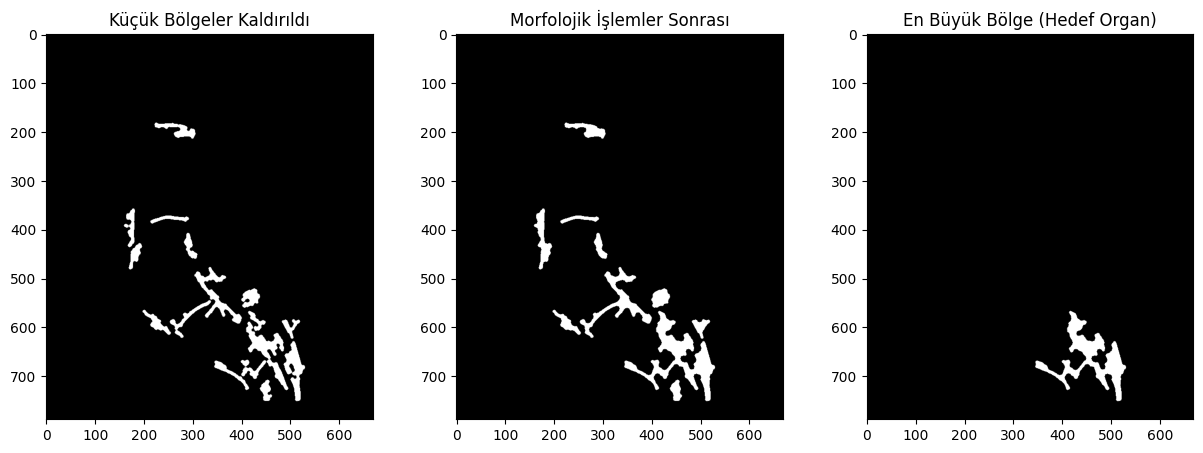

In [35]:
# --- İstenmeyen Bölgeleri Kaldırma ---

# 1. Küçük bölgeleri kaldır
min_region_size = 500  # Minimum bölge alanı (örneğin 500 piksel)
from skimage.measure import label
from skimage.morphology import remove_small_objects
cleaned_segmented = remove_small_objects(label(segmented), min_size=min_region_size) > 0

# 2. Morfolojik işlemleri iyileştirme
from skimage.morphology import binary_closing, binary_opening, disk
disk_size_closing = 5  # Closing için disk boyutu
disk_size_opening = 3  # Opening için disk boyutu

# Morfolojik işlemleri uygula
improved_segmented = binary_closing(cleaned_segmented, disk(disk_size_closing))
improved_segmented = binary_opening(improved_segmented, disk(disk_size_opening))

# 3. Yalnızca en büyük bölgeyi seç (opsiyonel, hedef organı izole etmek için)
from skimage.measure import regionprops
def keep_largest_region(segmented_image):
    """
    Yalnızca en büyük bölgeyi tut.
    :param segmented_image: Segmentasyon sonucu (binary image)
    :return: Yalnızca en büyük bölgeyi içeren binary image
    """
    labeled = label(segmented_image)
    regions = regionprops(labeled)
    if not regions:
        return segmented_image  # Hiçbir bölge yoksa, segmentasyonu olduğu gibi döndür

    # En büyük bölgeyi bul
    largest_region = max(regions, key=lambda r: r.area)

    # Yeni maske oluştur
    largest_region_mask = labeled == largest_region.label
    return largest_region_mask

largest_region_segmented = keep_largest_region(improved_segmented)

# Sonuçları görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cleaned_segmented, cmap='gray')
plt.title("Küçük Bölgeler Kaldırıldı")

plt.subplot(1, 3, 2)
plt.imshow(improved_segmented, cmap='gray')
plt.title("Morfolojik İşlemler Sonrası")

plt.subplot(1, 3, 3)
plt.imshow(largest_region_segmented, cmap='gray')
plt.title("En Büyük Bölge (Hedef Organ)")
plt.show()
